In [ ]:
#pip install dscribe

In [1]:
from dscribe.descriptors import MBTR #version 1.2.2
import matplotlib.pyplot as plt
from ase.io import read
from pylab import *
fig = plt.figure(figsize=(9,6))
plt.style.use('default')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["font.weight"] = "normal"
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [9,6]

<Figure size 900x600 with 0 Axes>

## MBTR alloys
### 1. Read POSCARs using the Atomic Simulation Environment (ASE)

In [2]:
bezno_25 = read('POSCAR_25%')
bezno_50 = read('POSCAR_50%')
bezno_75 = read('POSCAR_75%')

### 2. Initiate MBTR grid. 
There are six unique pairwise combinations: Be-Be, Be-Zn, Be-O, Zn-Zn, Zn-O, O-O. 

Each unique pairwise combinations has an MBTR array of $n\times1$ where $n$ is the number of grid points. In this case, $n=50$. The descriptor for one structure is the concatenation of all MBTR arrays, thus $300\times1$

In [3]:
mbtr_k2_grid_min = -0.1
mbtr_k2_grid_max =1
mbtr_k2_grid_n = 50 #number of points on grid
mbtr_k2_grid_sigma = 0.02 #broadening of Gaussian peaks
mbtr_k2_weight_scale = 0.7 #controls how quickly weight decreases when distance increases
mbtr_k2_weight_cutoff = 1e-3 #weight value for which an atom pair is no longer included. Usually fixed and only "scale" is adjusted
mbtr = MBTR(
    species=["Be", "Zn", "O"],
    k2={
        "geometry": {"function": "inverse_distance"},
        "grid": {   "min":      mbtr_k2_grid_min,
                    "max":      mbtr_k2_grid_max, 
                    "sigma":    mbtr_k2_grid_sigma,
                    "n":        mbtr_k2_grid_n},
        "weighting": {  "function"  : "exp",
                        "scale"     : mbtr_k2_weight_scale,
                        "threshold"    : mbtr_k2_weight_cutoff},
    },
    periodic=True,
)

#### 2a. How scale is calculated
$$ scale = -\frac{\log {cutoff}}{d} $$
where $d$ is the maximum distance between atom pairs that the user wants to keep in the MBTR representation

If I was interested in including atom pairs that are at least 10 angstroms apart

$$ scale = -\frac{\log 10^{-3}}{10} \approx 0.7 $$


### 3. Once grid is setup, it can be used on atomic structures read by ASE

In [4]:
bezno_25_mbtr = mbtr.create(bezno_25) #75% BeO and 25% ZnO
bezno_50_mbtr = mbtr.create(bezno_50) #50% BeO and 50% ZnO
bezno_75_mbtr = mbtr.create(bezno_75) #25% BeO and 75% ZnO

### 4. Output is interpretable. You can find specific pairwise element combinations (i.e. Be-Be, Be-O, Be-Zn, etc)


In [5]:
bebe_loc = mbtr.get_location(('Be', 'Be')) #0-50
beo_loc = mbtr.get_location(('Be', 'O')) #50-100
bezn_loc = mbtr.get_location(('Be', 'Zn')) #100-150

oo_loc = mbtr.get_location(('O', 'O')) #150-200

zno_loc = mbtr.get_location(('Zn', 'O')) #200-250
znzn_loc =mbtr.get_location(('Zn', 'Zn')) #250-300


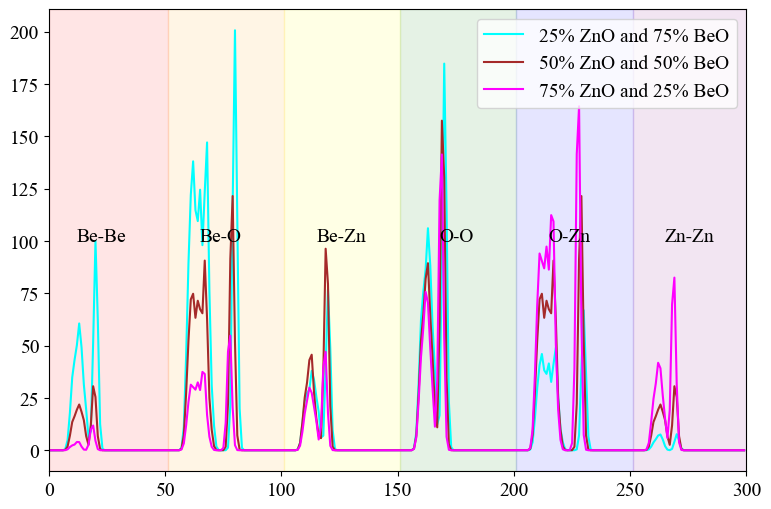

In [6]:
plt.plot(bezno_25_mbtr.reshape(-1,1), 'cyan',label = '25% ZnO and 75% BeO')
plt.plot(bezno_50_mbtr.reshape(-1,1), 'brown',label = '50% ZnO and 50% BeO')
plt.plot(bezno_75_mbtr.reshape(-1,1), 'magenta',label = '75% ZnO and 25% BeO')

plt.text(12,100,'Be-Be')
plt.text(65,100,'Be-O')
plt.text(115,100,'Be-Zn')
plt.text(168,100,'O-O')
plt.text(215,100,'O-Zn')
plt.text(265,100,'Zn-Zn')


plt.axvspan(0, 51, color='red', alpha=0.1)
plt.axvspan(51,101, color='orange', alpha=0.1)
plt.axvspan(101, 151, color='yellow', alpha=0.1)
plt.axvspan(151, 201, color='green', alpha=0.1)
plt.axvspan(201, 251, color='blue', alpha=0.1)
plt.axvspan(251, 301, color='purple', alpha=0.1)
plt.xlim([0,300])
plt.legend()